<img src='https://www.anadronestarting.com/wp-content/uploads/intel-main_opt.png' width=50%>

# 모바일넷을 이용한 이미지분류
<font size=5><b>(Image Classification using Mobilenet)<b></font>

<div align='right'>성  민  석<br>(Minsuk Sung)</div>

<img src='https://storage.googleapis.com/kaggle-datasets-images/111880/269359/a16c143f44e79d17f54d5e670f16e03b/dataset-cover.jpg?t=2019-02-01-19-30-12' width=90%>

---

<h1>강의목차<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#필요한-라이브러리-및-옵션" data-toc-modified-id="필요한-라이브러리-및-옵션-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>필요한 라이브러리 및 옵션</a></span><ul class="toc-item"><li><span><a href="#기본-라이브러리(Library)" data-toc-modified-id="기본-라이브러리(Library)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>기본 라이브러리(Library)</a></span></li><li><span><a href="#옵션(Option)" data-toc-modified-id="옵션(Option)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>옵션(Option)</a></span></li></ul></li><li><span><a href="#예제---CIFAR100" data-toc-modified-id="예제---CIFAR100-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>예제 - CIFAR100</a></span><ul class="toc-item"><li><span><a href="#CIFAR-100-데이터-불러오기" data-toc-modified-id="CIFAR-100-데이터-불러오기-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>CIFAR-100 데이터 불러오기</a></span></li><li><span><a href="#CIFAR10-데이터-형태-확인하기" data-toc-modified-id="CIFAR10-데이터-형태-확인하기-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>CIFAR10 데이터 형태 확인하기</a></span><ul class="toc-item"><li><span><a href="#Train-데이터셋" data-toc-modified-id="Train-데이터셋-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Train 데이터셋</a></span></li><li><span><a href="#Validation-데이터셋" data-toc-modified-id="Validation-데이터셋-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Validation 데이터셋</a></span></li><li><span><a href="#Test-데이터셋" data-toc-modified-id="Test-데이터셋-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Test 데이터셋</a></span></li></ul></li><li><span><a href="#데이터-시각화하기" data-toc-modified-id="데이터-시각화하기-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>데이터 시각화하기</a></span></li><li><span><a href="#모델링" data-toc-modified-id="모델링-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>모델링</a></span><ul class="toc-item"><li><span><a href="#ResNet50모델-생성" data-toc-modified-id="ResNet50모델-생성-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>ResNet50모델 생성</a></span></li><li><span><a href="#ResNet50-미세-조정" data-toc-modified-id="ResNet50-미세-조정-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>ResNet50 미세 조정</a></span></li><li><span><a href="#전체적인-모델-구성" data-toc-modified-id="전체적인-모델-구성-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>전체적인 모델 구성</a></span></li></ul></li><li><span><a href="#모델-컴파일" data-toc-modified-id="모델-컴파일-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>모델 컴파일</a></span></li><li><span><a href="#모델-확인하기" data-toc-modified-id="모델-확인하기-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>모델 확인하기</a></span></li><li><span><a href="#모델-학습하기" data-toc-modified-id="모델-학습하기-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>모델 학습하기</a></span></li><li><span><a href="#모델-평가하기" data-toc-modified-id="모델-평가하기-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>모델 평가하기</a></span><ul class="toc-item"><li><span><a href="#Train-/-Validation-Loss" data-toc-modified-id="Train-/-Validation-Loss-2.8.1"><span class="toc-item-num">2.8.1&nbsp;&nbsp;</span>Train / Validation Loss</a></span></li><li><span><a href="#Train-/-Validation-Accuaracy" data-toc-modified-id="Train-/-Validation-Accuaracy-2.8.2"><span class="toc-item-num">2.8.2&nbsp;&nbsp;</span>Train / Validation Accuaracy</a></span></li></ul></li><li><span><a href="#신경망-모델-검증하기" data-toc-modified-id="신경망-모델-검증하기-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>신경망 모델 검증하기</a></span></li><li><span><a href="#다음-예제에서는" data-toc-modified-id="다음-예제에서는-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>다음 예제에서는</a></span></li></ul></li><li><span><a href="#참고" data-toc-modified-id="참고-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>참고</a></span></li></ul></div>

## 필요한 라이브러리 및 옵션

### 기본 라이브러리(Library)

In [1]:
import os
import sys
import glob
import random
import warnings
import itertools
from tqdm import tqdm
from pathlib import Path

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [3]:
import cv2
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from IPython.display import SVG
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import Element, ElementTree

In [4]:
import keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist,cifar10,cifar100
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Conv2D,GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.losses import categorical_crossentropy,binary_crossentropy
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.metrics import top_k_categorical_accuracy
from tensorflow.python.client import device_lib

Using TensorFlow backend.
/home/minsuk/anaconda3/envs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/minsuk/anaconda3/envs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/minsuk/anaconda3/envs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/minsuk/anaconda3/

### 옵션(Option)

In [5]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"

warnings.filterwarnings(action='ignore')
warnings.filterwarnings(action='default')

%matplotlib inline
print(device_lib.list_local_devices())
keras.backend.tensorflow_backend._get_available_gpus()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14925120783594900468
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 7682135559916768946
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7763971277
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15846387144197562830
physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 12185788510114126499
physical_device_desc: "device: XLA_GPU device"
]






['/job:localhost/replica:0/task:0/device:GPU:0']

---

## 예제 - CIFAR100


![](https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png)

이번에도 캐글(Kaggle)에서 데이터셋을 구해봅시다. 그 중에서도 Intel에서 제공해준 이미지를 학습하여 장면(Scene)을 분류하는 예제를 해보도록 합시다. 데이터는 아래의 주소에서 구할 수 있습니다.

다운로드 : [Intel Image Classification | Kaggle](https://www.kaggle.com/puneet6060/intel-image-classification)

### CIFAR-100 데이터 불러오기

In [6]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'glacier': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=1234) #Shuffle the dataset you just prepared.

In [7]:
def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

In [8]:
Images, Labels = get_images('./data/intel-image-classification/train/') #Extract the training images from the folders.

X_train = np.array(Images) #converting the list of images to numpy array.
y_train = np.array(Labels)

In [9]:
Images, Labels = get_images('./data/intel-image-classification/test/') #Extract the training images from the folders.

X_test = np.array(Images) #converting the list of images to numpy array.
y_test = np.array(Labels)

In [10]:
# Train / Validation 데이터 분리하기
# Train 데이터를 Train / Validation 으로 나누어줌으로써 Overfitting 여부를 파악
# X_train, X_valid = X_train[:40000], X_train[40000:]
# y_train, y_valid = y_train[:40000], y_train[40000:]
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.2,shuffle=True,random_state=0)

In [11]:
# Train / Test 데이터의 크기 확인
print('Train 데이터의 크기 : {}'.format(len(X_train)))
print('Validation 데이터의 크기 : {}'.format(len(X_valid)))
print('Test 데이터의 크기 : {}'.format(len(X_test)))

Train 데이터의 크기 : 11227
Validation 데이터의 크기 : 2807
Test 데이터의 크기 : 3000


### CIFAR10 데이터 형태 확인하기

#### Train 데이터셋

In [12]:
print("X_train Shape : ",X_train.shape) # 32*32짜리 크기의 RGB 이미지 40000개
print("y_train Shape : ",y_train.shape) # 각 이미지별 레이블 40000개

X_train Shape :  (11227, 150, 150, 3)
y_train Shape :  (11227,)


#### Validation 데이터셋

In [13]:
print("X_val Shape : ",X_valid.shape) # 32*32짜리 크기의 RGB 이미지 10000개
print("y_val Shape : ",y_valid.shape) # 각 이미지별 레이블 10000개

X_val Shape :  (2807, 150, 150, 3)
y_val Shape :  (2807,)


#### Test 데이터셋

In [14]:
print("X_train Shape : ",X_test.shape) # 32*32짜리 크기의 RGB 이미지 10000개
print("y_train Shape : ",y_test.shape) # 각 이미지별 레이블 10000개

X_train Shape :  (3000, 150, 150, 3)
y_train Shape :  (3000,)


### 데이터 시각화하기

Train 데이터셋의 첫번재 데이터를 확인해보자

In [15]:
idx = 0
X_train[idx] # 3채널 RGB 이미지 

array([[[197, 229, 250],
        [198, 230, 251],
        [199, 231, 252],
        ...,
        [229, 235, 247],
        [228, 236, 247],
        [229, 237, 248]],

       [[195, 230, 250],
        [196, 231, 251],
        [199, 231, 252],
        ...,
        [243, 247, 255],
        [237, 244, 254],
        [233, 242, 251]],

       [[196, 231, 251],
        [197, 232, 252],
        [198, 233, 253],
        ...,
        [244, 247, 252],
        [239, 244, 250],
        [233, 240, 246]],

       ...,

       [[  8,   8,  10],
        [ 15,  15,  17],
        [ 24,  23,  28],
        ...,
        [131, 126, 107],
        [168, 163, 143],
        [209, 206, 187]],

       [[ 17,  17,  19],
        [ 22,  22,  24],
        [ 34,  33,  38],
        ...,
        [220, 213, 194],
        [156, 151, 129],
        [225, 220, 200]],

       [[ 17,  17,  19],
        [ 18,  18,  20],
        [ 31,  30,  35],
        ...,
        [164, 158, 136],
        [220, 214, 192],
        [238, 233, 211]]

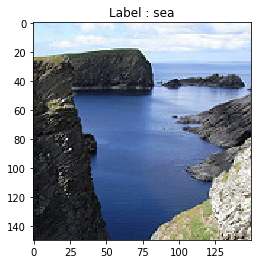

In [16]:
plt.imshow(X_train[idx], interpolation='nearest')
plt.title('Label : {}'.format(get_classlabel(y_train[idx])))
plt.show()

조금 더 많은 데이터를 확인해봅시다

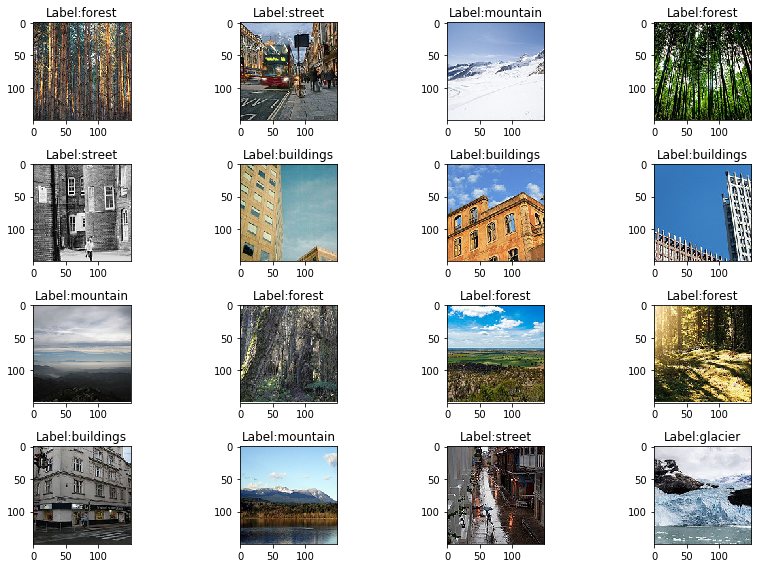

In [17]:
# 재연성을 위하여 랜덤시드 고정
np.random.seed(1234) 

# random 함수를 통해서 임의의 16개 데이터 가져오기
samples = np.random.randint(0,len(X_train)+1,size=16)

# MNIST를 그릴 Figure 준비
plt.figure(figsize=(12,8))

# 16개의 이미지 시각화
for count, n in enumerate(samples,start=1):
    plt.subplot(4, 4, count)
    plt.imshow(X_train[n], interpolation='nearest')
    label_name = "Label:" + str(get_classlabel(y_train[n]))
    plt.title(label_name)

plt.tight_layout()
plt.show()

In [18]:
# 데이터 크기 조정(Data Reshape)
X_train = X_train.reshape(X_train.shape[0],150,150,3)
X_valid = X_valid.reshape(X_valid.shape[0],150,150,3)
X_test = X_test.reshape(X_test.shape[0],150,150,3)

# 데이터 포맷 바꾸기
# 정수(int)인 데이터에서 실수(float)으로 변환
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')

# 데이터 정규화(Data Regularization)
# 이 과정을 통해서 추후 학습할 신경망이 조금 더 학습이 원할히 될 수 있게함
X_train = X_train / 255
X_valid = X_valid / 255
X_test = X_test / 255

# 원-핫 인코딩(One Hot Encoding)
# Keras의 to_categorical함수를 통해서 모든 Train 데이터의 레이블을 벡터화(Vectorize)
# ex) [3] -> [0 0 0 1 0 0 0 0 0 0]
y_train = to_categorical(y_train, 6) 
y_valid = to_categorical(y_valid,6)
y_test = to_categorical(y_test, 6)

### 모델링

 앞선 예제에서는 직접 CNN 모델을 구성하여 학습을 진행하였지만, 이번 예제에서는 VGGNet, ResNet, MobileNet과 같이 보편적으로 성능이 좋다고 알려져있는 CNN 모델을 사용해보자. Keras에서는 application 모듈에서 Pretrained된 모델을 사용할 수 있다. 이미지 분류에 사용할 수 있는 모델의 목록은 아래와 같다.
 
- Xception
- VGG16
- VGG19
- ResNet, ResNetV2
- InceptionV3
- InceptionResNetV2
- MobileNet
- MobileNetV2
- DenseNet
- NASNet

출처 : [Keras Documentation](https://keras.io/applications/)

이번 예제에서는 **`ResNet50`을 사용**해보도록 하자.

<img src='https://i.stack.imgur.com/XTo6Q.png' width=50%>

#### ResNet50모델 생성

In [19]:
# CIFAR-10의 이미지 형태
INPUT_SHAPE = (150, 150, 3)

# VGG16 객체 생성
base_model = ResNet50(input_shape=INPUT_SHAPE,  # CIFAR-10의 이미지 형태
                      include_top=False,  # FC Layer를 제거
                      weights='imagenet')

# ResNet50의 모든 Layer를 Freezing
base_model.trainable = True

/home/minsuk/anaconda3/envs/keras/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


#### ResNet50 미세 조정

In [20]:
# # ResNet의 상단 Layer를 학습가능여부
# set_trainable = False

# # res5c_branch2a, res5c_branch2b, res5c_branch2c 라는 이름의 Layer를 만나면 학습가능하게끔
# for layer in tqdm(base_model.layers):
#     if layer.name in ['res5a_branch2a','res5a_branch2b','res5a_branch2c',
#                       'res5b_branch2a','res5b_branch2b','res5b_branch2c',
#                       'res5c_branch2a','res5c_branch2b','res5c_branch2c']:
#         set_trainable = True
#     if set_trainable:
#         layer.trainable = True
#     else:
#         layer.trainable = False

In [21]:
layers = [(layer, layer.name, layer.trainable) for layer in base_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.In...,input_1,True
1,<tensorflow.python.keras.layers.convolutional....,conv1_pad,True
2,<tensorflow.python.keras.layers.convolutional....,conv1,True
3,<tensorflow.python.keras.layers.normalization....,bn_conv1,True
4,<tensorflow.python.keras.layers.core.Activatio...,activation,True
...,...,...,...
170,<tensorflow.python.keras.layers.core.Activatio...,activation_47,True
171,<tensorflow.python.keras.layers.convolutional....,res5c_branch2c,True
172,<tensorflow.python.keras.layers.normalization....,bn5c_branch2c,True
173,<tensorflow.python.keras.layers.merge.Add obje...,add_15,True


#### 전체적인 모델 구성

In [22]:
model = Sequential()

model.add(base_model) # ResNet50 추가
model.add(GlobalAveragePooling2D()) # Transfer Learning을 진행할때 항상 GAP Layer 추가
model.add(Dense(6, activation='softmax')) # 분류할 FC Layer 추가

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### 모델 컴파일

In [23]:
model.compile(loss=categorical_crossentropy, 
              optimizer=Adam(learning_rate=0.0001), 
              metrics=['acc'])

### 모델 확인하기

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 5, 5, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 12294     
Total params: 23,600,006
Trainable params: 23,546,886
Non-trainable params: 53,120
_________________________________________________________________


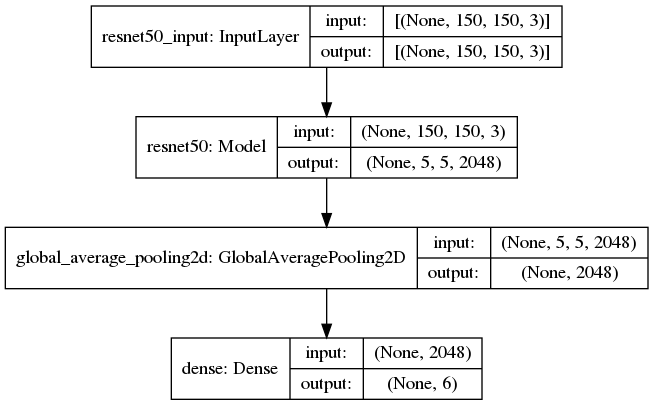

In [24]:
model.summary()

plot_model(model, to_file='./img/model/cifar100_resnet_model.png', show_shapes=True)

### 모델 학습하기

Keras의 `fit`의 메소드를 통해서 간단하게 학습가능하다. 이번 예제에서는 여기서는 10번의 epoch만으로 학습을 진행하도록 한다. 그리고 앞서 준비한 검증 데이터(Validation Set)을 통해서 신경망의 오버피팅 여부를 판단하도록 하자.

In [25]:
EPOCHS = 10

In [26]:
history = model.fit(X_train,  # 학습할 데이터
                    y_train,  # 학습할 레이블
                    epochs=EPOCHS,  # 전체 학습할 횟수
                    use_multiprocessing=True,
                    validation_data=(X_valid, y_valid) # 검증 데이터로 확인
                   )

Train on 11227 samples, validate on 2807 samples
Epoch 1/10
11227/11227 [==============================] - 82s 7ms/sample - loss: 0.3264 - acc: 0.8877 - val_loss: 2.9393 - val_acc: 0.1642
Epoch 2/10
11227/11227 [==============================] - 76s 7ms/sample - loss: 0.1058 - acc: 0.9656 - val_loss: 0.9782 - val_acc: 0.6918
Epoch 3/10
11227/11227 [==============================] - 76s 7ms/sample - loss: 0.0539 - acc: 0.9825 - val_loss: 0.3565 - val_acc: 0.9006
Epoch 4/10
11227/11227 [==============================] - 76s 7ms/sample - loss: 0.0510 - acc: 0.9816 - val_loss: 0.3566 - val_acc: 0.9120
Epoch 5/10
11227/11227 [==============================] - 76s 7ms/sample - loss: 0.0373 - acc: 0.9883 - val_loss: 0.4404 - val_acc: 0.8953
Epoch 6/10
11227/11227 [==============================] - 76s 7ms/sample - loss: 0.0523 - acc: 0.9822 - val_loss: 0.3326 - val_acc: 0.9173
Epoch 7/10
11227/11227 [==============================] - 76s 7ms/sample - loss: 0.0301 - acc: 0.9906 - val_loss: 0.3

In [27]:
model.save('./bin/scene_resnet50.h5')

### 모델 평가하기

In [28]:
# Train 데이터로 평가하기
train_loss, train_acc= model.evaluate(X_train,y_train,verbose=0)
print('Train Loss : {}'.format(train_loss))
print('Train Accuracy : {}'.format(train_acc))

# Validation 데이터로 평가하기
valid_loss, valid_acc = model.evaluate(X_valid,y_valid,verbose=0)
print('Validation Loss : {}'.format(valid_loss))
print('Validation Accuracy : {}'.format(valid_acc))

Train Loss : 0.03304734686692347
Train Accuracy : 0.9895787239074707
Validation Loss : 0.332184816616092
Validation Accuracy : 0.9173494577407837


#### Train / Validation Loss

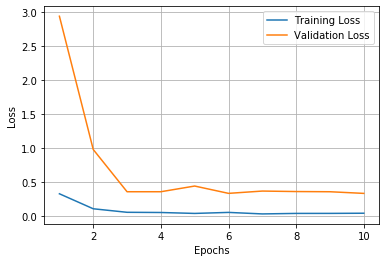

In [29]:
# Train / Validation 데이터에 대해서 Loss 시각화
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#### Train / Validation Accuaracy

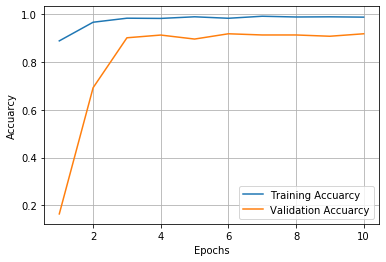

In [30]:
# Train / Validation 데이터에 대해서 Accuracy 시각화
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,label='Training Accuarcy')
plt.plot(epochs,val_acc,label='Validation Accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.grid(True)
plt.show()

### 신경망 모델 검증하기

In [31]:
test_loss, test_acc = model.evaluate(X_test,y_test,verbose=0)
print('Test Loss : {}'.format(test_loss))
print('Test Accuracy : {}'.format(test_acc))

Test Loss : 0.3762654103835424
Test Accuracy : 0.902999997138977


RenNet으로 학습한 신경망이 과연 어떠한 이미지를 잘 못 예측했는지 확인해보자

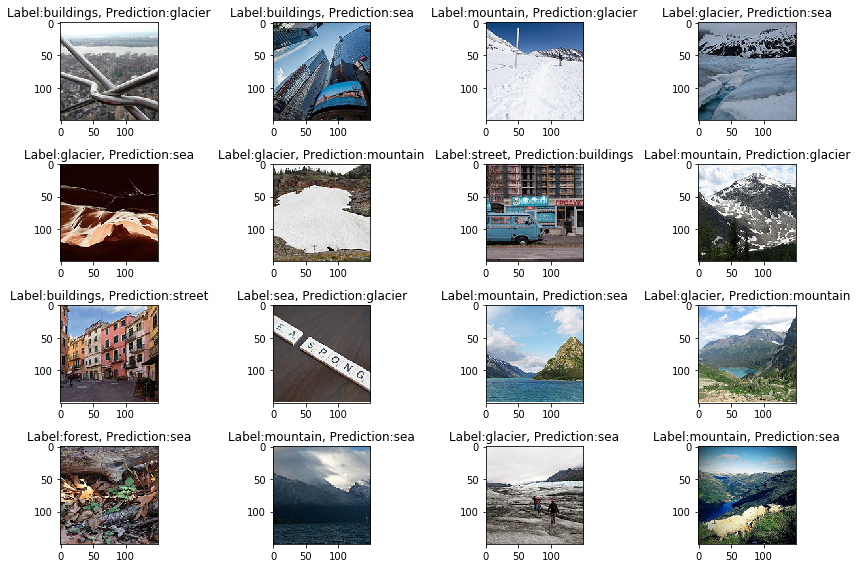

In [32]:
# 재연성을 위하여 랜덤시드 고정
random.seed('intel')

# TEST 데이터 예측하기
predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)

# TEST 데이터의 정답 가져오기
test_labels = np.argmax(y_test, axis=1)

# 잘못 예측한 데이터 찾기
wrong_result = []
for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

# random 함수를 통해서 임의의 16개 데이터 가져오기
samples = random.choices(population=wrong_result, k=16)        
        
# 그릴 Figure 준비
plt.figure(figsize=(12, 8))

# 16개의 이미지 시각화
for count, n in enumerate(samples, start=1):
    plt.subplot(4, 4, count)
    plt.imshow(X_test[n], interpolation='nearest')
    label = "Label:" + get_classlabel(test_labels[n])
    pred = "Prediction:" + get_classlabel(predicted_labels[n])
    plt.title(label+', '+pred)

plt.tight_layout()
plt.savefig('./img/intel_classification_wrong_result.png')
plt.show()

### 다음 예제에서는

![](https://miro.medium.com/max/5250/1*n16lj3lSkz2miMc_5cvkrA.jpeg)

ResNet50모델을 통해서 이제 VGG-16모델에서 가장 큰 이슈였던 많은 양의 파라미터는 해결됐다. ResNet50은 VGG-16모델보다 적은 파라미터로 더 좋은 성능을 낼 수 있다. 하지만 여전히 이정도의 파라미터는 작은 디바이스에서 학습하기엔 문제가 된다. 그렇기 때문에 이러한 이슈를 해결하고자 다음 예제에서는 `MobileNet`을 이용하는 예제를 해보자.

---

## 참고

- Intel
    - https://www.intel.co.kr/
- Intel OpenVINO
    - https://software.intel.com/en-us/openvino-toolkit
- MNIST
    - http://yann.lecun.com/exdb/mnist/
- CIFAR10
    - https://www.cs.toronto.edu/~kriz/cifar.html
- ImageNet
    - http://www.image-net.org
- Tensorflow
    - https://www.tensorflow.org/?hl=ko
- Keras
    - https://keras.io/
    - https://tensorflow.blog/2019/03/06/tensorflow-2-0-keras-api-overview/
    - https://tykimos.github.io/2017/02/22/Integrating_Keras_and_TensorFlow/
    - https://tykimos.github.io/2017/03/08/CNN_Getting_Started/
    - https://raw.githubusercontent.com/keras-team/keras-docs-ko/master/sources/why-use-keras.md
- Keras to Caffe
     - https://github.com/uhfband/keras2caffe
     - http://www.deepvisionconsulting.com/from-keras-to-caffe/
- Fully Connected Layer
    - https://sonofgodcom.wordpress.com/2018/12/31/cnn%EC%9D%84-%EC%9D%B4%ED%95%B4%ED%95%B4%EB%B3%B4%EC%9E%90-fully-connected-layer%EB%8A%94-%EB%AD%94%EA%B0%80/
- Convultional Nueral Network
    - http://aikorea.org/cs231n/convolutional-networks/
    - http://cs231n.stanford.edu/
- CNN Models
    - https://ratsgo.github.io/deep%20learning/2017/10/09/CNNs/
- Kaggle
    - https://www.kaggle.com/uzairrj/beg-tut-intel-image-classification-93-76-accur
   
- VOC2012
    - https://blog.godatadriven.com/rod-keras-multi-label
    - https://gist.github.com/rragundez/ae3a17428bfec631d1b35dcdc6296a85#file-multi-label_classification_with_keras_imagedatagenerator-ipynbhttps://fairyonice.github.io/Part_5_Object_Detection_with_Yolo_using_VOC_2012_data_training.html
    - http://research.sualab.com/introduction/2017/11/29/image-recognition-overview-1.html